In [1]:
from eiscirc import ImpedanceModel, ImpedanceFitter
import numpy as np
import matplotlib.pyplot as plt

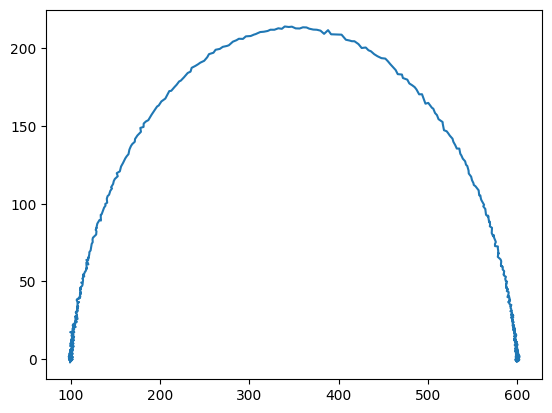

In [7]:
# Create a circuit and generate synthetic data
model = ImpedanceModel("R0-CPE1//R1")
true_params = {"R0": 100,"CPE1": (1e-6, .9), "R1": 500}
#model.set_params(**true_params)

frequencies = np.logspace(-3, 6, 1000)  # 1mHz to 1MHz
omega = 2 * np.pi * frequencies
Z_ideal = model.impedance(omega, true_params)

noise = 0.8 * np.random.normal(size=Z_ideal.shape)  # 80% noise
Z_data = Z_ideal + noise
plt.plot (Z_data[:len(omega)], -Z_data[len(omega):])

Before fit {'R0': 100, 'C1': 1e-06, 'R1': 100}
After fit namespace(R0=np.float64(107.69755254527882), C1=np.float64(2.0607785576335225e-06), R1=np.float64(486.90003219438216))
After fit {'R0': np.float64(107.69755254527882), 'C1': np.float64(2.0607785576335225e-06), 'R1': np.float64(486.90003219438216)}
RMSE: 8.74e+00


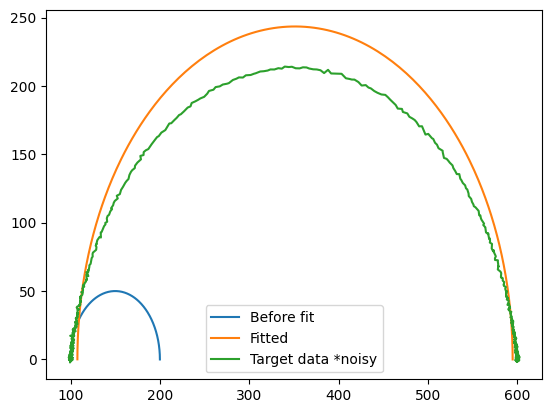

In [8]:
#model_fit = ImpedanceModel("R0-C1//R1")

#fitter = ImpedanceFitter(model_fit, frequencies, Z_data)
#fitter.set_bounds(R0=(1, 1e3))
#fitter.set_initial_guess(C1=1e-6)
#fitter.set_fixed_params(R0=100)

model_fit = ImpedanceModel("R0-C1//R1")

fitter = ImpedanceFitter(model_fit, frequencies, Z_data)
#fitter.set_initial_guess(CPE1_alpha=0.39)

plt.plot(model_fit.Z_real, -model_fit.Z_imag, label='Before fit')

print ("Before fit", model_fit._params)

result = fitter.fit()

print ("After fit", model_fit.param_values)
print ("After fit", result.parameters)
print(f"RMSE: {result.rmse:.2e}")

plt.plot(model_fit.Z_real, -model_fit.Z_imag, label='Fitted')
plt.plot (Z_data[:len(omega)], -Z_data[len(omega):], label = "Target data *noisy")
plt.legend()